# #2. Internals

0. [Motivation](#Motivation)
1. [Execution](#Execution)
    1. [Compiled or interpreted](#Compiled-or-interpreted)
    2. [.pyc](#.pyc)
2. [CPython](#CPython)
    1. [Source structure](#Source-structure)
    2. [Simple program](#Simple-program)
    3. [Object](#Object)
    4. [Eval loop](#Eval-loop)
    5. [Code objects](#Code-objects)
    6. [Frames](#Frames)
3. [Objects](#Objects)
    1. [Integer](#Integer)
    2. [String](#String)
    3. [List](#List)
    4. [Dict](#Dict)
4. [Memory](#Memory)
    1. [Model](#Model)
    2. [Allocator](#Allocator)
    3. [Garbage collector](#Garbage-collector)
        1. [Reference counting](#Reference-counting)
        2. [Circular references](#Circular-references)
5. [GIL](#GIL)

## Motivation

__Goal__

Получить представление о принципах работы интерпретатора языка и сделать выводы о том, как особенности его устройства будут влиять на написание и исполнение кода

__Homework__

* `LOAD_OTUS` opcode
* `i++`
* `until`

## Execution

#### Compiled or interpreted

* Implementation dependent
    * CPython: default
* CPython is interptreted
    * "compiles" to bytecode
    * interpretes bytecode
    * CPython = compiler + VM
* Python Virtual machine (PVM)
    * simple stack machine
* Machine code v.s bytecode
    * machine code is faster
    * bytecode is portable
* Alternative VMs
    * Jython, IronPython
    * Why?
    

In [ ]:
Jython 2.1b1 on java1.4.0-beta3 (JIT: null)
Type "copyright", "credits" or "license" for more information.
>>> from com.ziclix.python.sql import zxJDBC
>>> d, u, p, v = "jdbc:mysql://localhost/test", None, None,
"org.gjt.mm.mysql.Driver"
>>> db = zxJDBC.connect(d, u, p, v)
 optionally
>>> db = zxJDBC.connect(d, u, p, v, CHARSET='iso_1')
>>>

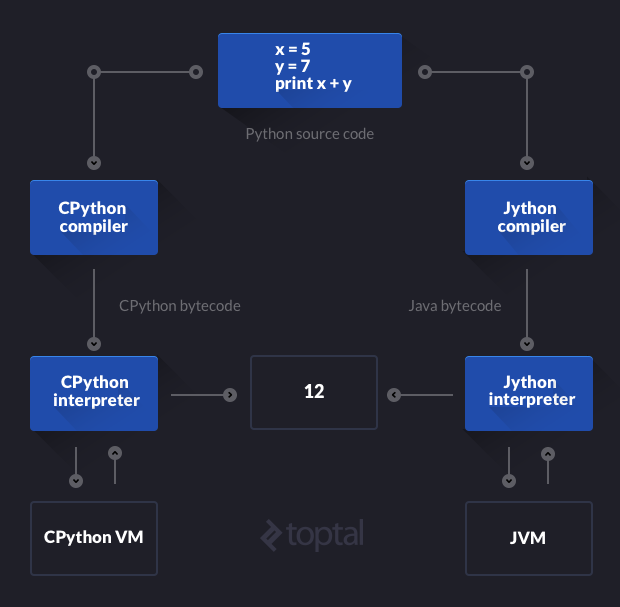

* Optimizations
    * -O
        * asserts
    * -OO
        * docstring
    * .pyc
        * startup speed optimization
    * .pyo
        * .pyc with -O

#### .pyc

* platform independent
* version sensitive
* structure
    * magic
    * mtime
    * code object

In [5]:
# everything is code object!
print(compile('sum([1, 2, 3])', '', 'single'))
exec(compile('sum([1, 2, 3])', '', 'single'))

<code object <module> at 0x11004ac00, file "", line 1>


6

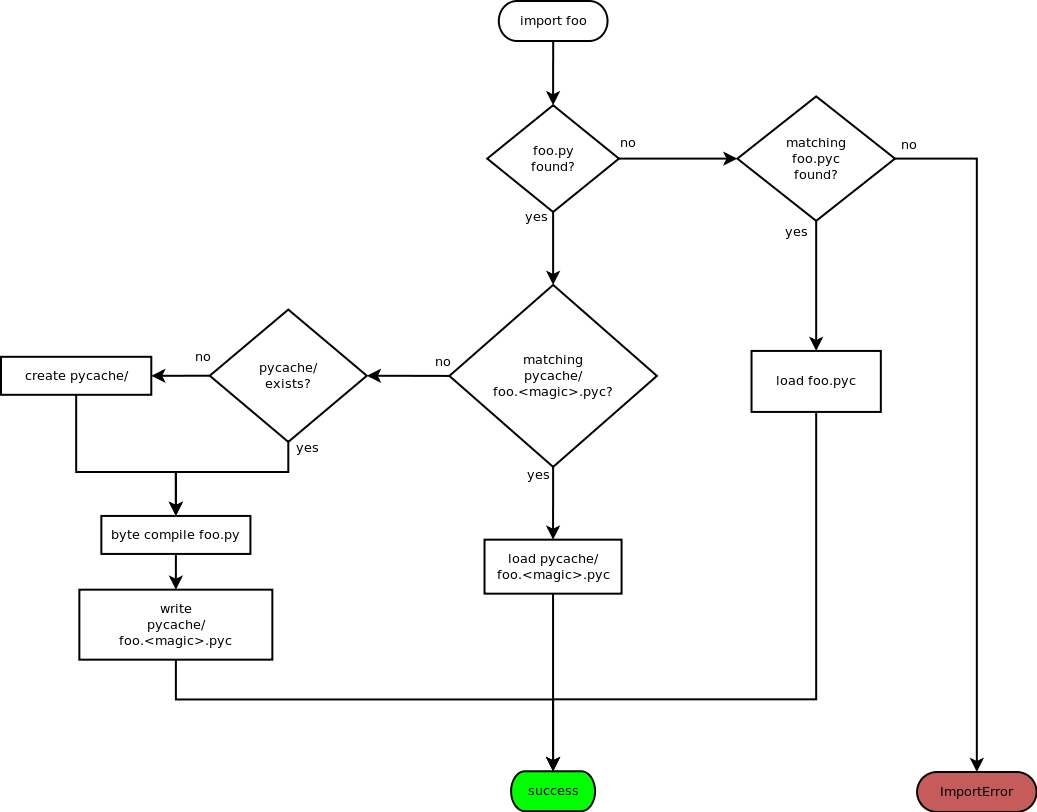

In [ ]:
# %load simple_code.py
def f(a, b):
    if a or b:
        print("Hello", a)

a, b = 1, 0
f(a, b)


In [2]:
import dis, marshal, struct, sys, time, types

def show_file(fname):
    f = open(fname, "rb")
    magic = f.read(4)
    moddate = f.read(4)
    modtime = time.asctime(time.localtime(struct.unpack('I', moddate)[0]))
    print "magic %s" % (magic.encode('hex'))
    print "moddate %s (%s)" % (moddate.encode('hex'), modtime)
    code = marshal.load(f)
    show_code(code)
     
def show_code(code, indent=''):
    print "%scode" % indent
    indent += '   '
    print "%sargcount %d" % (indent, code.co_argcount)
    print "%snlocals %d" % (indent, code.co_nlocals)
    print "%sstacksize %d" % (indent, code.co_stacksize)
    print "%sflags %04x" % (indent, code.co_flags)
    show_hex("code", code.co_code, indent=indent)
    dis.disassemble(code)
    print "%sconsts" % indent
    for const in code.co_consts:
        if type(const) == types.CodeType:
            show_code(const, indent+'   ')
        else:
            print "   %s%r" % (indent, const)
    print "%snames %r" % (indent, code.co_names)
    print "%svarnames %r" % (indent, code.co_varnames)
    print "%sfreevars %r" % (indent, code.co_freevars)
    print "%scellvars %r" % (indent, code.co_cellvars)
    print "%sfilename %r" % (indent, code.co_filename)
    print "%sname %r" % (indent, code.co_name)
    print "%sfirstlineno %d" % (indent, code.co_firstlineno)
    show_hex("lnotab", code.co_lnotab, indent=indent)
     
def show_hex(label, h, indent):
    h = h.encode('hex')
    if len(h) < 60:
        print "%s%s %s" % (indent, label, h)
    else:
        print "%s%s" % (indent, label)
        for i in range(0, len(h), 60):
            print "%s   %s" % (indent, h[i:i+60])

show_file("simple_code.pyc")

magic 03f30d0a
moddate 41e25b59 (Tue Jul  4 21:45:21 2017)
code
   argcount 0
   nlocals 0
   stacksize 2
   flags 0040
   code
      6404005c02005a00005a0100650000731800650100722400640200476500
      0047486e000064030053
  1           0 LOAD_CONST               4 ((1, 0))
              3 UNPACK_SEQUENCE          2
              6 STORE_NAME               0 (a)
              9 STORE_NAME               1 (b)

  2          12 LOAD_NAME                0 (a)
             15 POP_JUMP_IF_TRUE        24
             18 LOAD_NAME                1 (b)
             21 POP_JUMP_IF_FALSE       36

  3     >>   24 LOAD_CONST               2 ('Hello')
             27 PRINT_ITEM          
             28 LOAD_NAME                0 (a)
             31 PRINT_ITEM          
             32 PRINT_NEWLINE       
             33 JUMP_FORWARD             0 (to 36)
        >>   36 LOAD_CONST               3 (None)
             39 RETURN_VALUE        
   consts
      1
      0
      'Hello'
      None
      (

### References

* http://pclib.github.io/safari/program/learning-python/Text/ch02s02.html
* https://twitter.com/hynek/status/587336939239419904
* https://www3.hhu.de/stups/downloads/pdf/BoCuFiRi09_246.pdf
* https://hacks.mozilla.org/2017/02/a-crash-course-in-just-in-time-jit-compilers/
* https://docs.python.org/2/reference/executionmodel.html
* https://docs.python.org/2/library/inspect.html
* https://nedbatchelder.com/blog/200804/the_structure_of_pyc_files.html

### Summary

* CPython (default implementation) is interpreted
* There are alternative VMs
* JIT is powerfull but not always help
* Python does some evaluation at definition time: function, classes
* Python optimizations are not very useful

## CPython

#### Source structure

In [1]:
%env SOURCE /Users/s.stupnikov/Coding/cpython

env: SOURCE=/Users/s.stupnikov/Coding/cpython


In [6]:
import os
sorted([n for n in os.listdir("/Users/s.stupnikov/Coding/cpython") if not n.startswith(".")])

['CODE_OF_CONDUCT.md',
 'Doc',
 'Grammar',
 'Include',
 'LICENSE',
 'Lib',
 'Mac',
 'Makefile.pre.in',
 'Misc',
 'Modules',
 'Objects',
 'PC',
 'PCbuild',
 'Parser',
 'Programs',
 'Python',
 'README.rst',
 'Tools',
 'aclocal.m4',
 'config.guess',
 'config.sub',
 'configure',
 'configure.ac',
 'install-sh',
 'm4',
 'netlify.toml',
 'pyconfig.h.in',
 'setup.py']

* Include - public interfaces (python-devel)
* Lib - Python portion of stdlib
* Modules - C portion of stdlib
* Objects - tuples, lists, PyObject, etc.
* Python - Python itself

#### Simple program

In [71]:
# ! - run shell command
! python -c 'sum([1, 2, 3]) + 42'

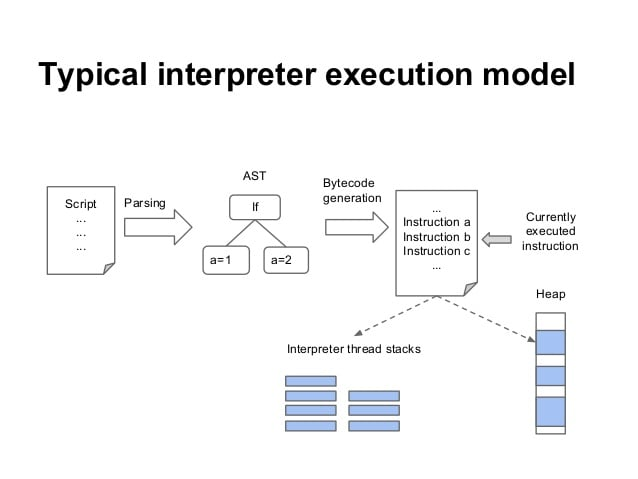

* ./Modules/python.c: main
* ./Modules/main.c: Py_Main
    * parse arguments
    * see if environment variables should affect behaviour
    * etc.
* ./Python/pythonrun.c: Py_Initialize - assembles interpreter
    * interpreter state
    * thread state
    * sys
    * builtins
* ./Python/pythonrun.c: PyRun_SimpleStringFlags - called with `-c`
    * \__main\__
* ./Parser/pgen.c
    * tokenize
    * Concrete Syntax Tree (CST) (parse tree)
* Python/ast.c
    * CST to Abstract Syntax Tree (AST)
* ./Python/compile.c 
    * AST to Control Flow Graph
    * CFG to code object 
* ./Python/pythonrun.c: run_mod, v = PyEval_EvalCode(co, globals, locals);
    * frame object (thread state point to stack of frames)
* ./Python/ceval.c: PyEval_EvalFrameEx.
    * execute opcode by opcode
* ./Python/pythonrun.c: Py_Finalize

In [8]:
import ast
import dis
import parser
source = 'sum([1, 2, 3]) + 42'
st = parser.suite(source)
print(parser.st2list(st), end="\n\n")
node = ast.parse(source, mode='eval')
print(ast.dump(node), end="\n\n")
codeobj = compile(node, '<string>', mode='eval')
dis.disassemble(codeobj)
print(eval(codeobj))

[257, [269, [270, [271, [272, [274, [305, [309, [310, [311, [312, [315, [316, [317, [318, [319, [320, [321, [322, [323, [324, [1, 'sum']], [326, [7, '('], [334, [335, [305, [309, [310, [311, [312, [315, [316, [317, [318, [319, [320, [321, [322, [323, [324, [9, '['], [325, [305, [309, [310, [311, [312, [315, [316, [317, [318, [319, [320, [321, [322, [323, [324, [2, '1']]]]]]]]]]]]]]]], [12, ','], [305, [309, [310, [311, [312, [315, [316, [317, [318, [319, [320, [321, [322, [323, [324, [2, '2']]]]]]]]]]]]]]]], [12, ','], [305, [309, [310, [311, [312, [315, [316, [317, [318, [319, [320, [321, [322, [323, [324, [2, '3']]]]]]]]]]]]]]]]], [10, ']']]]]]]]]]]]]]]]]]], [8, ')']]]]]], [14, '+'], [320, [321, [322, [323, [324, [2, '42']]]]]]]]]]]]]]]]]]], [4, '']]], [4, ''], [0, '']]

Expression(body=BinOp(left=Call(func=Name(id='sum', ctx=Load()), args=[List(elts=[Num(n=1), Num(n=2), Num(n=3)], ctx=Load())], keywords=[]), op=Add(), right=Num(n=42)))

  1           0 LOAD_NAME                0 (su

* VM part of interptreter executes bytecode
    * simple stack machine
    * PyObject* stack - bytecode operates on objects
        * stack frames allocated on the heap
        * block stack
            * store information about nested loops, try, and with statements
    * VM knows nothing about concrete types
    * Object know nothing about VM

#### Object

In [12]:
! grep -B4 "} PyObject;" $SOURCE/Include/object.h

typedef struct _object {
    _PyObject_HEAD_EXTRA
    Py_ssize_t ob_refcnt;
    PyTypeObject *ob_type;
} PyObject;


In [17]:
! grep -A3 "define _PyObject_HEAD_EXTRA " $SOURCE/Include/object.h

#define _PyObject_HEAD_EXTRA            \
    struct _object *_ob_next;           \
    struct _object *_ob_prev;



* ob_refcnt
    * reference counting, garbage collection
    * Py_DECREF, Py_INCREF
    * https://docs.python.org/2.7/c-api/intro.html#reference-counts
* ob_type
    * PyNumber_Add handles int, floats, etc
    * https://docs.python.org/2.7/c-api/typeobj.html#type-objects

In [22]:
! grep -A82 "struct _typeobject {" $SOURCE/Include/cpython/object.h

struct _typeobject {
    PyObject_VAR_HEAD
    const char *tp_name; /* For printing, in format "<module>.<name>" */
    Py_ssize_t tp_basicsize, tp_itemsize; /* For allocation */

    /* Methods to implement standard operations */

    destructor tp_dealloc;
    Py_ssize_t tp_vectorcall_offset;
    getattrfunc tp_getattr;
    setattrfunc tp_setattr;
    PyAsyncMethods *tp_as_async; /* formerly known as tp_compare (Python 2)
                                    or tp_reserved (Python 3) */
    reprfunc tp_repr;

    /* Method suites for standard classes */

    PyNumberMethods *tp_as_number;
    PySequenceMethods *tp_as_sequence;
    PyMappingMethods *tp_as_mapping;

    /* More standard operations (here for binary compatibility) */

    hashfunc tp_hash;
    ternaryfunc tp_call;
    reprfunc tp_str;
    getattrofunc tp_getattro;
    setattrofunc tp_setattro;

    /* Functions to access object as input/output buffer */
    PyBufferProcs *tp_as_buffer;

    /* Flags to define presence of 

* new type (class) inherits slots from parent
* type_new
    * fixup_slot_dispatchers

Protocols
* Object
* Buffer
* Number
* Mapping
* Sequence

#### Eval loop

* PyEval_EvalFrameEx at ./Python/ceval.c
* Python 2: #define CASE_TOO_BIG

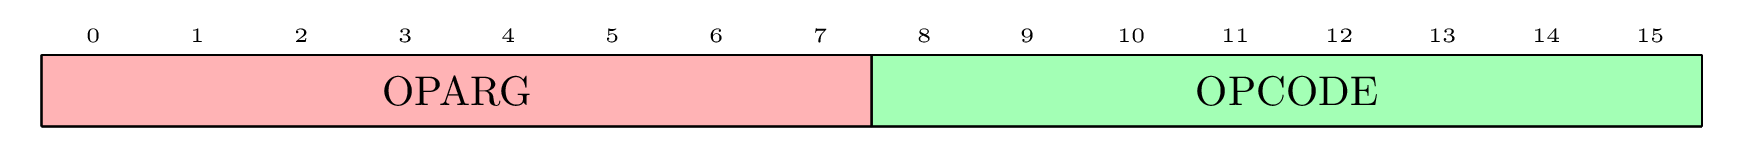

In [25]:
! grep -A25 BINARY_ADD $SOURCE/Python/ceval.c

        case TARGET(BINARY_ADD): {
            PyObject *right = POP();
            PyObject *left = TOP();
            PyObject *sum;
            /* NOTE(haypo): Please don't try to micro-optimize int+int on
               CPython using bytecode, it is simply worthless.
               See http://bugs.python.org/issue21955 and
               http://bugs.python.org/issue10044 for the discussion. In short,
               no patch shown any impact on a realistic benchmark, only a minor
               speedup on microbenchmarks. */
            if (PyUnicode_CheckExact(left) &&
                     PyUnicode_CheckExact(right)) {
                sum = unicode_concatenate(tstate, left, right, f, next_instr);
                /* unicode_concatenate consumed the ref to left */
            }
            else {
                sum = PyNumber_Add(left, right);
                Py_DECREF(left);
            }
            Py_DECREF(right);
            SET_TOP(sum);
            if (sum == NULL)
        

In [ ]:
PyEval_EvalFrame(PyFrameObject *f, int throwflag)
{
    /* variable declaration and initialization stuff */
    for (;;) {
        /* do periodic housekeeping once in a few opcodes */
        opcode = NEXTOP();
        if (HAS_ARG(opcode)) oparg = NEXTARG();
        switch (opcode) {
            case NOP:
                goto fast_next_opcode;
            /* lots of more complex opcode implementations */
            default:
                /* become rather unhappy */
        }
        /* handle exceptions or runtime errors, if any */
    }
    /* we are finished, pop the frame stack */
    tstate->frame = f->f_back;
    return retval;
}

In [26]:
! grep -A13 PyNumber_Add  $SOURCE/Objects/abstract.c

PyNumber_Add(PyObject *v, PyObject *w)
{
    PyObject *result = binary_op1(v, w, NB_SLOT(nb_add));
    if (result == Py_NotImplemented) {
        PySequenceMethods *m = Py_TYPE(v)->tp_as_sequence;
        Py_DECREF(result);
        if (m && m->sq_concat) {
            return (*m->sq_concat)(v, w);
        }
        result = binop_type_error(v, w, "+");
    }
    return result;
}



* Computed-GOTOs
    * https://eli.thegreenplace.net/2012/07/12/computed-goto-for-efficient-dispatch-tables
    * compilers optimize “switch” statement as a single indirect branch instruction with a lookup table of addresses
    * create an explicit jump table and place an explicit indirect jump instruction at the end of each opcode

In [27]:
! head $SOURCE/Python/opcode_targets.h

static void *opcode_targets[256] = {
    &&_unknown_opcode,
    &&TARGET_POP_TOP,
    &&TARGET_ROT_TWO,
    &&TARGET_ROT_THREE,
    &&TARGET_DUP_TOP,
    &&TARGET_DUP_TOP_TWO,
    &&TARGET_ROT_FOUR,
    &&_unknown_opcode,
    &&_unknown_opcode,


In [ ]:
TARGET(NOP)
    FAST_DISPATCH();

In [ ]:
TARGET_NOP:
    opcode = NOP;
    if (HAS_ARG(NOP))
        oparg = NEXTARG();
case NOP:
    {
        if (!_Py_TracingPossible) {
            f->f_lasti = INSTR_OFFSET();
            goto *opcode_targets[*next_instr++];
        }
        goto fast_next_opcode;
    }


#### Scoping

* LOAD_NAME and STORE_NAME
    * dictionary lookup
* LOAD_FAST and STORE_FAST
    * local namespace implemented with a statically sized array
* LOAD_GLOBAL and STORE_GLOBAL
* LOAD_DEREF and STORE_DEREF
    * if a variable is seen to be resolved from a lexically nested function, it will not be stored and will not be accessed using the regular naming opcodes. Instead, a special object called a cell is created to store the value of the object. When various code objects (the outer function, the inner function, etc) will access this variable, the use of the *\_DEREF opcodes will cause the cell to be accessed rather than the namespace of the accessing code object
    * https://docs.python.org/2.7/c-api/cell.html#cell-objects

In [123]:
def LOAD_NAME(name):
    try:
        return current_stack_frame.locals[name]
    except KeyError:
        try:
            return current_stack_frame.globals[name]
        except KeyError:
            try:
                return current_stack_frame.builtins[name]
            except KeyError:
                raise NameError('name %r is not defined' % name)

def STORE_NAME(name, value):
    current_stack_frame.locals[name] = value

In [124]:
import dis

def func():
    a = 1
    a = b
    return a

dis.dis(func)

  4           0 LOAD_CONST               1 (1)
              3 STORE_FAST               0 (a)

  5           6 LOAD_GLOBAL              0 (b)
              9 STORE_FAST               0 (a)

  6          12 LOAD_FAST                0 (a)
             15 RETURN_VALUE        


In [125]:
import dis

a = 1

def func():
    global a
    a = 42

dis.dis(func)

  7           0 LOAD_CONST               1 (42)
              3 STORE_GLOBAL             0 (a)
              6 LOAD_CONST               0 (None)
              9 RETURN_VALUE        


#### Code objects

Code execution in CPython is really the evaluation (interpretation) of a code object

In [118]:
# the opcode module has a mapping of opcode
#  byte values to their symbolic names
import opcode
import struct
unsigneg_char = struct.Struct("B")
# ord
unpack_unsigneg_char = lambda c: unsigneg_char.unpack(c)[0]

def return42(): return 42

# this is the function's code object
print(return42.__code__)

# this is the actual bytecode
print(return42.__code__.co_code)

# this is the field holding constants
print(return42.__code__.co_consts)

# the first opcode is LOAD_CONST
import struct
print(opcode.opname[unpack_unsigneg_char(return42.__code__.co_code[0])])

# LOAD_CONST has one word as an operand
#  let's get its value
print(unpack_unsigneg_char(return42.__code__.co_code[1]))

# and which constant can we find in offset 1?
print(return42.__code__.co_consts[1])

# finally, the next opcode
print(opcode.opname[unpack_unsigneg_char(return42.__code__.co_code[2])]


<code object return42 at 0x1109b4f30, file "<ipython-input-118-4c2b6c721258>", line 9>
d S
(None, 42)
LOAD_CONST
1
42
RETURN_VALUE


In [29]:
print(dir(return42.__code__))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'co_argcount', 'co_cellvars', 'co_code', 'co_consts', 'co_filename', 'co_firstlineno', 'co_flags', 'co_freevars', 'co_kwonlyargcount', 'co_lnotab', 'co_name', 'co_names', 'co_nlocals', 'co_stacksize', 'co_varnames']


* co_name
    * A name (a string) for this code object; for a function this would be the function’s name, for a class this would be the class’ name, etc. The compile builtin doesn’t let you specify this, so all code objects generated with it carry the name <module>.
* co_filename
    * The filename from which the code was compiled. Will be <stdin> for code entered in the interactive interpreter or whatever name is given as the second argument to compile for code objects created with compile.
Different types of names (string tuples)
* co_varnames
    * A tuple containing the names of the local variables (including arguments). To parse this tuple properly you need to look at co_flags and the counter fields listed below, so you’ll know which item in the tuple is what kind of variable. In the ‘richest’ case, co_varnames contains (in order): positional argument names (including optional ones), keyword only argument names (again, both required and optional), varargs argument name (i.e., *args), kwds argument name (i.e., **kwargs), and then any other local variable names.
* co_cellvars
    * A tuple containing the names of local variables that are stored in cells because they are referenced by lexically nested functions.
* co_freevars
    * A tuple containing the names of free variables. Generally, a free variable means a variable which is referenced by an expression but isn’t defined in it. It means a variable that is referenced in this code object but was defined and will be dereferenced to a cell in another code object.
* co_names
	* A tuple containing the names which aren’t covered by any of the other fields (they are not local variables, they are not free variables, etc) used by the bytecode. This includes names deemed to be in the global or builtin namespace as well as attributes (i.e., if you do foo.bar in a function, bar will be listed in its code object’s names).
* co_firstlineno
	* The line offset where the code object’s source code began, relative to the module it was defined in, starting from one. In this, each input line typed in the interactive interpreter is a module of its own.
* co_code
	* A string representing the sequence of bytecode instructions, contains a stream of opcodes and their operands (or rather, indexes which are used with other code object fields to represent their operands, as we saw above).
* co_consts
	* A tuple containing the literals used by the bytecode.
* co_lnotab
	* A string encoding the mapping from bytecode offsets to line numbers. ./Python/compile.c or ./Lib/dis.py: findlinestarts.
* co_flags
	* An integer encoding a number of flags regarding the way this code object was created. The list of possible flags is listed in ./Include/code.h, as a small example: CO_NESTED, which marks a code object which was compiled from a lexically nested function. Flags also have an important role in the implementation of the \__future\__ mechanism.

#### Frames

* Call stack is a stack data structure that stores information about the active subroutines of a computer program 
    * composed of stack frames
* Stack frame corresponds to a call to a subroutine which has not yet terminated with a return

In [32]:
! grep -A32 "struct _frame {" $SOURCE/Include/cpython/frameobject.h

struct _frame {
    PyObject_VAR_HEAD
    struct _frame *f_back;      /* previous frame, or NULL */
    PyCodeObject *f_code;       /* code segment */
    PyObject *f_builtins;       /* builtin symbol table (PyDictObject) */
    PyObject *f_globals;        /* global symbol table (PyDictObject) */
    PyObject *f_locals;         /* local symbol table (any mapping) */
    PyObject **f_valuestack;    /* points after the last local */
    /* Next free slot in f_valuestack.  Frame creation sets to f_valuestack.
       Frame evaluation usually NULLs it, but a frame that yields sets it
       to the current stack top. */
    PyObject **f_stacktop;
    PyObject *f_trace;          /* Trace function */
    char f_trace_lines;         /* Emit per-line trace events? */
    char f_trace_opcodes;       /* Emit per-opcode trace events? */

    /* Borrowed reference to a generator, or NULL */
    PyObject *f_gen;

    int f_lasti;                /* Last instruction if called */
    /* Call PyFrame_Get

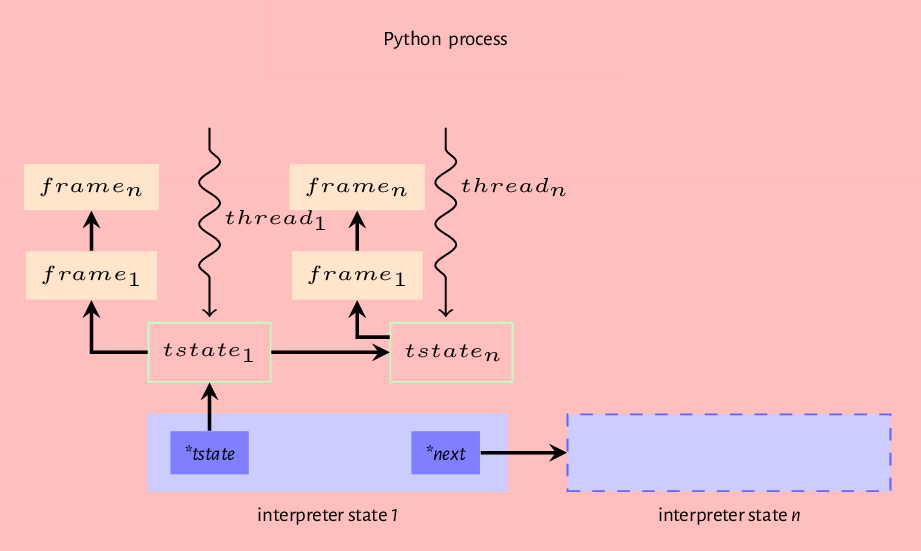

* every frame represents a currently-being-evaluated code object (f_code)
* frame objects are linked to one another, thus forming a call stack of frames
* inside each frame object in the call stack there’s a reference to two frame-specific stacks , they are the value stack and the block stack
    * value stack - LOAD, STORE, POP, PUSH
    * block stack - for, try

In [33]:
def f():
    for c in 'string':
        my_global_list.append(c)
dis.dis(f)

  2           0 SETUP_LOOP              22 (to 24)
              2 LOAD_CONST               1 ('string')
              4 GET_ITER
        >>    6 FOR_ITER                14 (to 22)
              8 STORE_FAST               0 (c)

  3          10 LOAD_GLOBAL              0 (my_global_list)
             12 LOAD_METHOD              1 (append)
             14 LOAD_FAST                0 (c)
             16 CALL_METHOD              1
             18 POP_TOP
             20 JUMP_ABSOLUTE            6
        >>   22 POP_BLOCK
        >>   24 LOAD_CONST               0 (None)
             26 RETURN_VALUE


* Frame creation occurs whenever a code object should be evaluated
    * a function is called
    * a module is imported (the module’s top-level code is executed)
    * a class is defined
    * for every discrete command entered in the interactive interpreter
    * when the builtins eval or exec are used
    * when the -c switch is used 

* Optimizations (comments at Objects/frameobject.c)
    * co_zombieframe
    * free_list

### References

* https://www.python.org/dev/peps/pep-0339/
* https://github.com/python/cpython/tree/2.7
* https://habr.com/post/314062/
* https://www.youtube.com/watch?v=HVUTjQzESeo
* http://doar-e.github.io/blog/2014/04/17/deep-dive-into-pythons-vm-story-of-load_const-bug/
* https://tech.blog.aknin.name/2010/04/02/pythons-innards-introduction/
* http://eli.thegreenplace.net/tag/python-internals
* http://pgbovine.net/cpython-internals.htm
* https://late.am/post/2012/03/26/exploring-python-code-objects.html
* http://www.ics.uci.edu/~brgallar/week9_3.html
* https://troeger.eu/files/teaching/pythonvm08.pdf
* http://pyvideo.org/pycon-us-2012/stepping-through-cpython.html
* https://leanpub.com/insidethepythonvirtualmachine/read
* https://www.youtube.com/watch?v=mxjv9KqzwjI
* https://indianpythonista.wordpress.com/2018/01/05/demystifying-pyc-files/

### Summary

* CPython consits of compiler and VM
* VM is stack-based
* Everything is Object
* Every object has a type; the type of an object dictates the stuff that can be done to/with the object
* Bytecode from code objects executed in frames opcode by opcode inside eval loop within the context of the given frame

## Objects

#### Integer

In [36]:
! grep -A4 "_longobject {" $SOURCE/Include/longintrepr.h

struct _longobject {
    PyObject_VAR_HEAD
    digit ob_digit[1];
};



In [39]:
! grep -B3 "PyVarObject;" $SOURCE/Include/object.h

typedef struct {
    PyObject ob_base;
    Py_ssize_t ob_size; /* Number of items in variable part */
} PyVarObject;


#### String

In [46]:
! grep -B10 "PyBytesObject;" $SOURCE/Include/cpython/bytesobject.h

typedef struct {
    PyObject_VAR_HEAD
    Py_hash_t ob_shash;
    char ob_sval[1];

    /* Invariants:
     *     ob_sval contains space for 'ob_size+1' elements.
     *     ob_sval[ob_size] == 0.
     *     ob_shash is the hash of the string or -1 if not computed yet.
     */
} PyBytesObject;


* ob_shash is the hash of the string if calculated
* ob_sval contains the string of size
* The string is null terminated

In [12]:
! grep -B11 "interned = NULL;" $SOURCE/Objects/unicodeobject.c

#define INTERNED_STRINGS

/* This dictionary holds all interned unicode strings.  Note that references
   to strings in this dictionary are *not* counted in the string's ob_refcnt.
   When the interned string reaches a refcnt of 0 the string deallocation
   function will delete the reference from this dictionary.

   Another way to look at this is that to say that the actual reference
   count of a string is:  s->ob_refcnt + (s->state ? 2 : 0)
*/
#ifdef INTERNED_STRINGS
static PyObject *interned = NULL;


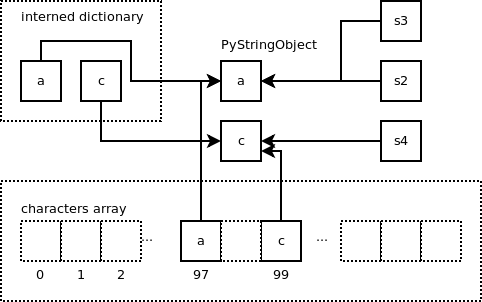

What gets interned?
* 0 and 1 length strings
* when building a code object more strings are interned (constants)

#### List

In [2]:
! grep -B17 "} PyListObject;" $SOURCE/Include/cpython/listobject.h

typedef struct {
    PyObject_VAR_HEAD
    /* Vector of pointers to list elements.  list[0] is ob_item[0], etc. */
    PyObject **ob_item;

    /* ob_item contains space for 'allocated' elements.  The number
     * currently in use is ob_size.
     * Invariants:
     *     0 <= ob_size <= allocated
     *     len(list) == ob_size
     *     ob_item == NULL implies ob_size == allocated == 0
     * list.sort() temporarily sets allocated to -1 to detect mutations.
     *
     * Items must normally not be NULL, except during construction when
     * the list is not yet visible outside the function that builds it.
     */
    Py_ssize_t allocated;
} PyListObject;


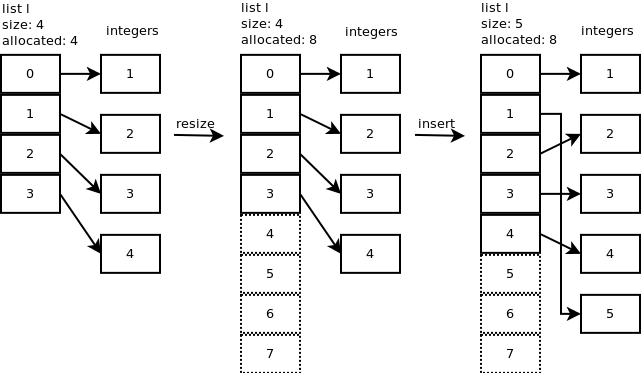

#### Dict

In [7]:
! grep -B21 "} PyDictObject;" $SOURCE/Include/cpython/dictobject.h

/* The ma_values pointer is NULL for a combined table
 * or points to an array of PyObject* for a split table
 */
typedef struct {
    PyObject_HEAD

    /* Number of items in the dictionary */
    Py_ssize_t ma_used;

    /* Dictionary version: globally unique, value change each time
       the dictionary is modified */
    uint64_t ma_version_tag;

    PyDictKeysObject *ma_keys;

    /* If ma_values is NULL, the table is "combined": keys and values
       are stored in ma_keys.

       If ma_values is not NULL, the table is splitted:
       keys are stored in ma_keys and values are stored in ma_values */
    PyObject **ma_values;
} PyDictObject;


* open adressing
* quadratic probing
    * size 32: 3 -> 11 -> 19 -> 29 -> 5 -> 6 -> 16 -> 31 -> 28 -> 13 -> 2…

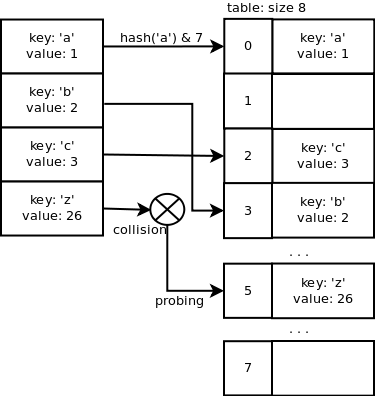

### References

* http://guilload.com/python-string-interning/
* http://effbot.org/zone/python-hash.htm
* http://www.laurentluce.com/posts/python-list-implementation/
* http://www.laurentluce.com/posts/python-dictionary-implementation
* https://arpitbhayani.me/blogs/super-long-integers
* https://tenthousandmeters.com/blog/python-behind-the-scenes-8-how-python-integers-work/

### Summary

* every object implementation is interesting in its own way
* lots of small optimizations

## Memory

#### Model

Object-graph memory model
* Lisp
* if you have several entities of the same type, each one will be identified by a pointer
* finding a particular attribute of an entity involves navigating the object graph starting from that pointer
* put heavy demands on garbage collectors
* Haskell, ML, Python, Ruby, PHP5, Lua, JavaScript, Erlang, and Smalltalk 

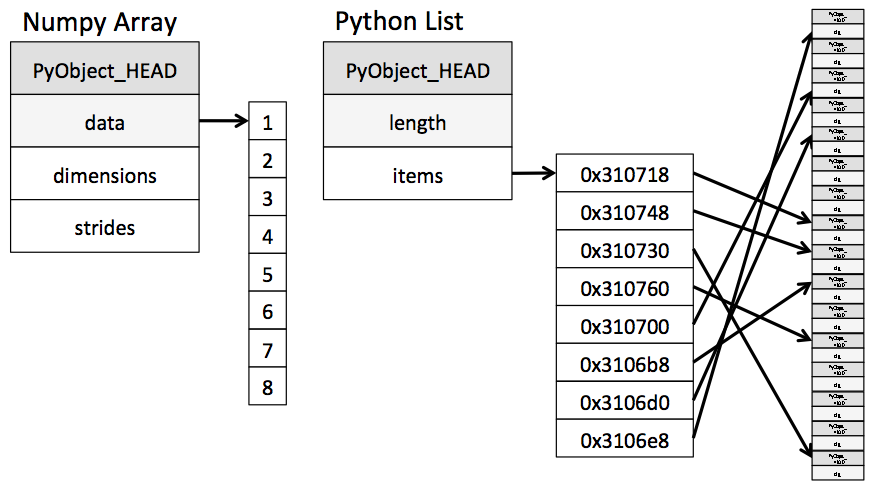

#### Allocator

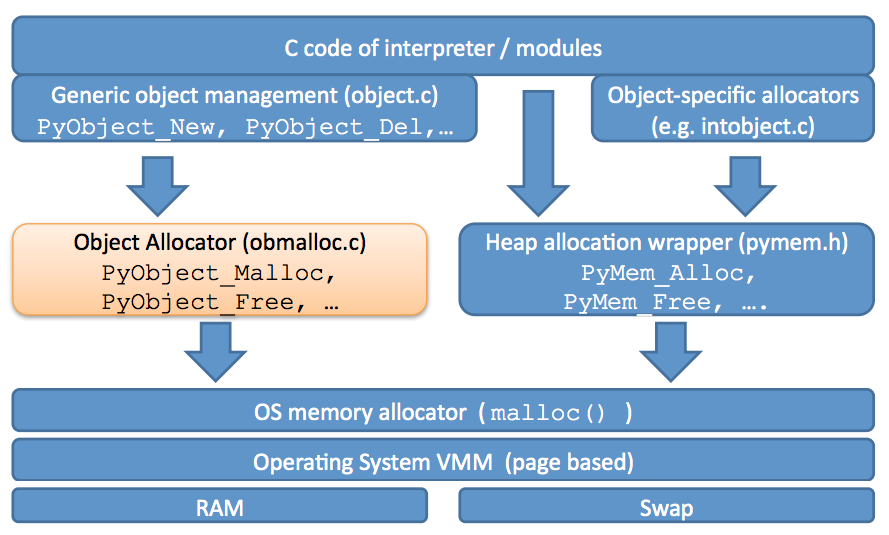

* Many small allocations
    * everything is an object
* Optimizations
    * \> 256 (512 in 3.3) bytes handled by `malloc`
        * The GNU libc uses `brk()` or `mmap()` depending on a threshold: 128 KB by default
    * smaller allocations grouped
        * memory pools of 4k length each
        * pools used by defferent request size allocators
        * 8 byte size alignment

Small objects allocator
* allocates memory in 256 kB chunks, called arenas
* arenas are divided into 4 kB pools
* pools subdivided into blocks

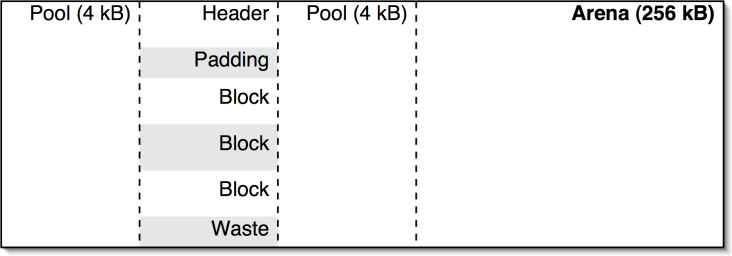

* `usedpools` array for storing partially allocated pools
    *  If there is a pool, we pop a block off of its list. This is the most common case and it is very fast as it only requires a few memory reads and one write.

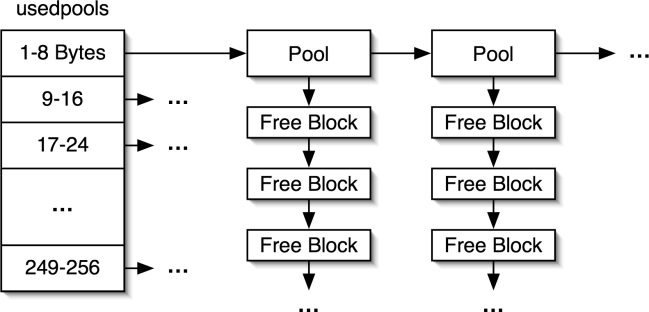

* pop pool from freepools
* or create new pool, tweak `arenabase`
* or `malloc` a new arena

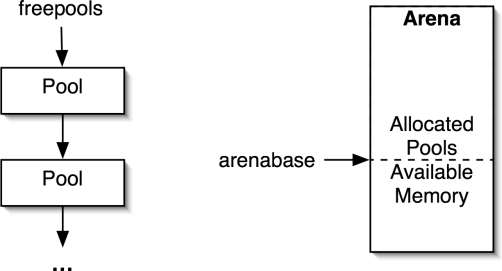

* Python "never" returns memory to OS
    * if there is one block inside one pool inside arena then we should keep whole arena alive

#### Garbage collector

CPython GC alorithm is Reference counting with cycle detector
* stops the world, but does so more infrequently than other implementations
* memory fragmentation occurs
* slower. Reference count garbage collector will spread the work across normal activities and perform collection less frequently

#### Reference Counting

* Py_INCREF, Py_DECREF
    * safe versions: Py_XINCREF, Py_XDECREF
* Py_CLEAR -  for members of another structures
* \_\_del\_\_ method warning

In [164]:
! grep -A8 "define Py_DECREF" $SOURCE/Include/object.h

#define Py_DECREF(op)                                   \
    do {                                                \
        if (_Py_DEC_REFTOTAL  _Py_REF_DEBUG_COMMA       \
        --((PyObject*)(op))->ob_refcnt != 0)            \
            _Py_CHECK_REFCNT(op)                        \
        else                                            \
        _Py_Dealloc((PyObject *)(op));                  \
    } while (0)



#### Circular references

* 3 generations (0, 1, 2). If object survives collection phase  move it to next generation
* `gc.set_threshold(threshold0[, threshold1[, threshold2]])`
* when number of allocations minus the number of deallocations exceeds `threshold0`, collection starts
* only focuses on container objects (i.e. objects that can contain a reference to one or more objects): arrays, dictionaries, user class instances, etc
    * ignores tuples containing only immutable types

Algorithm:
* When the GC starts, it has all the container objects it wants to scan on a scanned list 
    * each object in container has a `gc_ref` field initially set to the reference count
* GC then goes through each container object and decrements by 1 the `gc_ref` of any other object it is referencing
    * only care about the references from outside the “objects to scan” list (like variables) and not references from other container objects inside that list
* The GC scans again the container objects. The objects whose `gc_ref` is zero are marked as `GC_TENTATIVELY_UNREACHABLE` and moved to the tentatively unreachable list
* If `gc_ref` > 0 object marked as `GC_REACHABLE`
* When the GC encounters an object which is reachable, it traverses its references to find all the objects that are reachable from it, marking them as well as `GC_REACHABLE`
* tentatively unreachable can be garbage collected

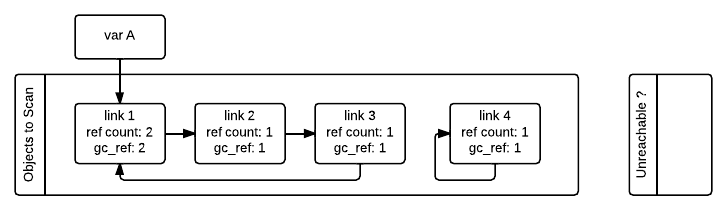

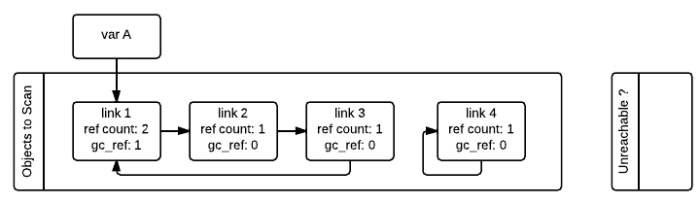

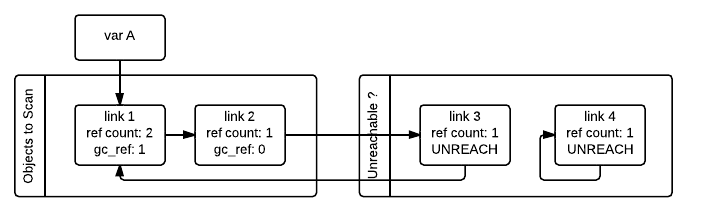

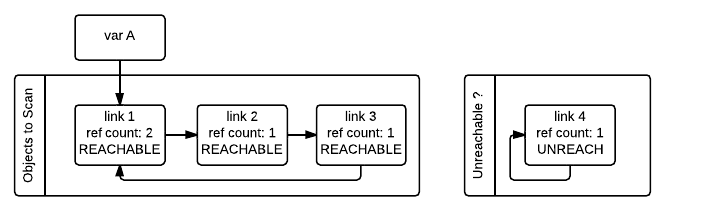

### References

* http://canonical.org/~kragen/memory-models/
* http://www.evanjones.ca/memoryallocator/
* https://rushter.com/blog/python-memory-managment/
* https://www.quora.com/How-does-garbage-collection-in-Python-work
* http://patshaughnessy.net/2013/10/24/visualizing-garbage-collection-in-ruby-and-python
* https://docs.python.org/2/library/gc.html
* https://www.slideshare.net/PiotrPrzymus/lncs-40402619
* https://pythoninternal.wordpress.com/2014/08/04/the-garbage-collector/
* https://engineering.instagram.com/dismissing-python-garbage-collection-at-instagram-4dca40b29172

### Summary

* LISP-like memory model
* special allocator for small objects
* large object allocated on the heap
* garbage collection with reference counting and cycle detection

### GIL

* opcodes belong to currently evaluating code objects
* which belong to currently evaluating frames
* which belong to Pythonic threads
* which belong to interpreters

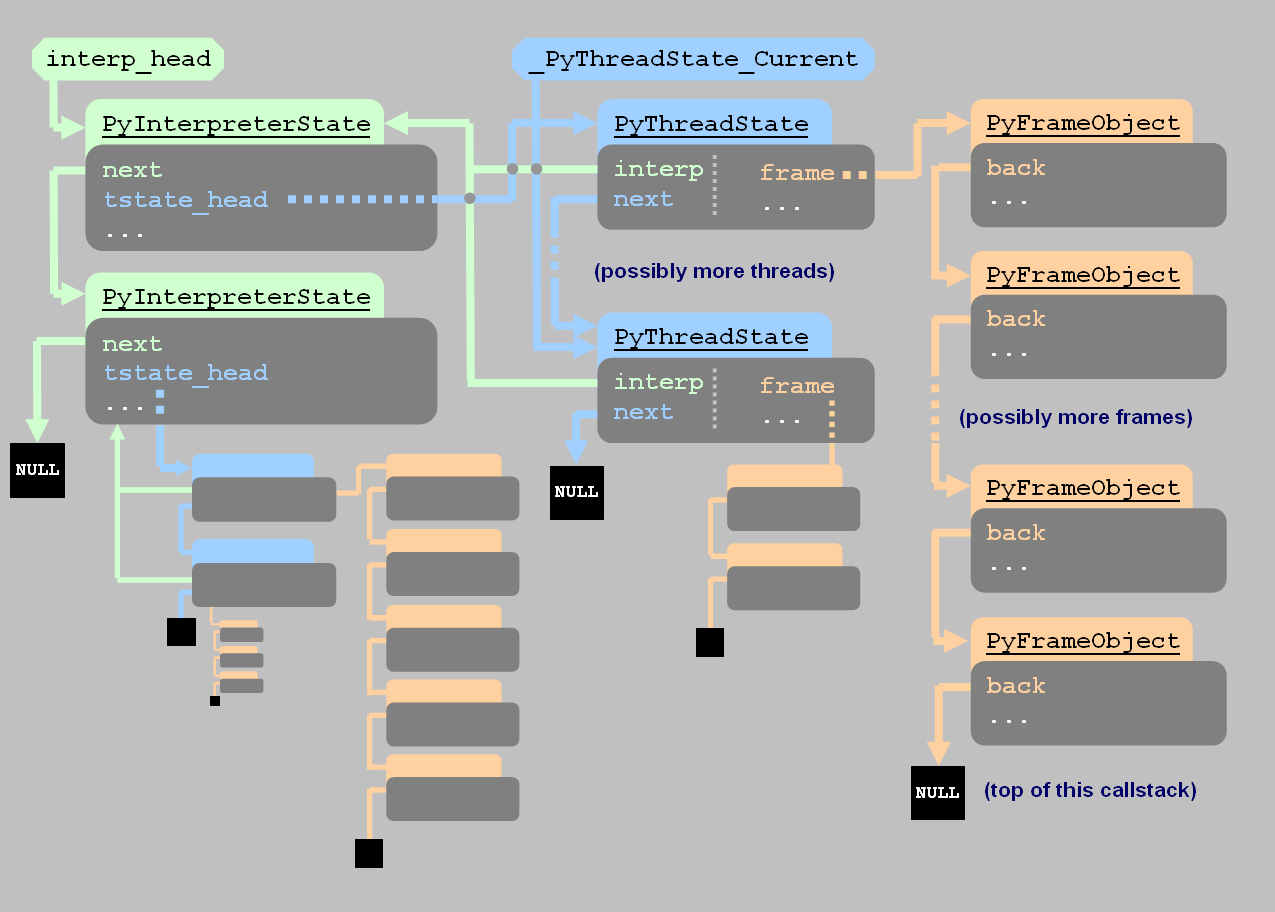

In [52]:
! grep -A90 "_ts {" $SOURCE/Include/cpython/pystate.h

struct _ts {
    /* See Python/ceval.c for comments explaining most fields */

    struct _ts *prev;
    struct _ts *next;
    PyInterpreterState *interp;

    /* Borrowed reference to the current frame (it can be NULL) */
    PyFrameObject *frame;
    int recursion_depth;
    char overflowed; /* The stack has overflowed. Allow 50 more calls
                        to handle the runtime error. */
    char recursion_critical; /* The current calls must not cause
                                a stack overflow. */
    int stackcheck_counter;

    /* 'tracing' keeps track of the execution depth when tracing/profiling.
       This is to prevent the actual trace/profile code from being recorded in
       the trace/profile. */
    int tracing;
    int use_tracing;

    Py_tracefunc c_profilefunc;
    Py_tracefunc c_tracefunc;
    PyObject *c_profileobj;
    PyObject *c_traceobj;

    /* The exception currently being raised */
    PyObject *curexc_type;
    PyObject *curexc_value;
    PyObjec

The Need for a GIL
* it's easier to implement VM
* provides much needed synchronization when performing certain tasks
    * reference counting
* not all C calls thread-safe

* current thread state `*_PyThreadState_Current` is a global variable
* there could be only one current thread state

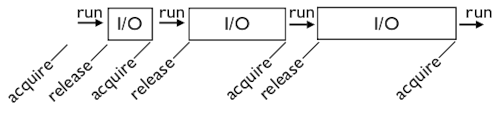

* I/O bound threads are OK 

In [170]:
! grep -A7 "#define Py_BEGIN_ALLOW_THREADS { \\\\" $SOURCE/Include/ceval.h

#define Py_BEGIN_ALLOW_THREADS { \
                        PyThreadState *_save; \
                        _save = PyEval_SaveThread();
#define Py_BLOCK_THREADS        PyEval_RestoreThread(_save);
#define Py_UNBLOCK_THREADS      _save = PyEval_SaveThread();
#define Py_END_ALLOW_THREADS    PyEval_RestoreThread(_save); \
                 }



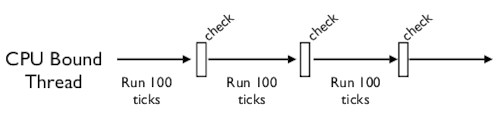

* should work that way in theory
* it doesn't actually

In [ ]:
# in Python 2: release and immediately reacquire

            if (interpreter_lock) {
                /* Give another thread a chance */

                if (PyThreadState_Swap(NULL) != tstate)
                    Py_FatalError("ceval: tstate mix-up");
                PyThread_release_lock(interpreter_lock);

                /* Other threads may run now */

                PyThread_acquire_lock(interpreter_lock, 1);
                if (PyThreadState_Swap(tstate) != NULL)
                    Py_FatalError("ceval: orphan tstate");

                /* Check for thread interrupts */

                if (tstate->async_exc != NULL) {
                    x = tstate->async_exc;
                    tstate->async_exc = NULL;
                    PyErr_SetNone(x);
                    Py_DECREF(x);
                    why = WHY_EXCEPTION;
                    goto on_error;
                }
            }

In [ ]:
# new GIL. gil_drop_request forces GIL realease if it was acquired by someone
static _Py_atomic_int gil_drop_request = {0};

### References

* http://www.dabeaz.com/python/UnderstandingGIL.pdf
* https://docs.python.org/2.7/c-api/init.html#threads
* https://tech.blog.aknin.name/2010/05/26/pythons-innards-pystate/
* https://www.youtube.com/watch?v=hx8PlltQYAM
* https://www.youtube.com/watch?v=P3AyI_u66Bw
* https://vstinner.github.io/python37-gil-change.html

### Summary

* there is no thread-level parallelism
* except for I/O
* for parallel computing involving heavy CPU processing, prefer message passing and cooperating processes to thread programming 